In [1]:
# https://covid.ourworldindata.org/data/full_data.csv

# PYTHON LIBRARIES
%matplotlib inline

import pandas as pd
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from adjustText import adjust_text
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# CONSTANTS
markerSymbol = [
    "o", #circle
    "v", #triangle_down
    "^", #triangle_up
    "<", #triangle_left
    ">", #triangle_right
    "s", #square
    "p", #pentagon
    "P", #plus (filled)
    "*", #star
    "H", #hexagon2
    "X", #x (filled)
    "D", #diamond
    "d", #thin_diamond
    "1", #tri_down
    "2", #tri_up
    "3", #tri_left
    "4", #tri_right
    "+", #plus
    "x"  #x
];

markerColour = [
    '#b71c1c', #red darken-4
    '#1a237e', #indigo darken-4
    '#004d40', #teal darken-4
    '#f57f17', #yellow darken-4
    '#3e2723', #brown darken-4    
    '#4a148c', #purple darken-4
    '#01579b', #light-blue darken-4
    '#33691e', #light-green darken-4
    '#e65100', #orange darken-4
    '#263238', #blue-grey darken-4
    '#880e4f', #pink darken-4
    '#0d47a1', #blue darken-4
    '#1b5e20', #green darken-4
    '#ff6f00', #amber darken-4
    '#212121', #grey darken-4
    '#311b92', #deep-purple darken-4
    '#006064', #cyan darken-4
    '#827717', #lime darken-4
    '#bf360c',  #deep-orange darken-4
    
    '#004d40', #teal darken-4
    '#006064', #cyan darken-4
    '#01579b', #light-blue darken-4
    '#1a237e', #indigo darken-4
    '#1b5e20', #green darken-4
    '#212121', #grey darken-4
    '#311b92', #deep-purple darken-4
    '#33691e', #light-green darken-4
    '#3e2723', #brown darken-4    
    '#4a148c', #purple darken-4
    '#827717', #lime darken-4
    '#880e4f', #pink darken-4
    '#b71c1c', #red darken-4
    '#bf360c', #deep-orange darken-4
    '#e65100', #orange darken-4
    '#f57f17', #yellow darken-4
    '#ff6f00'  #amber darken-4
];

# df.loc[<ROWS RANGE> , <COLUMNS RANGE>] to get elements by index
# df_raw = pd.read_csv("https://covid.ourworldindata.org/data/full_data.csv", delimiter=",");

---
# ./Raman.csv
---

In [2]:
df_ram_raw = pd.read_csv("./Raman.csv", delimiter=",");
print("./Raman.csv"); display(df_ram_raw.head(2));

./Raman.csv


,#WaveA,#IntensityA,#WaveB,#IntensityB,#WaveB00,#IntensityB00,#WaveB01,#IntensityB01,#WaveB02,#IntensityB02,...,#WaveB30,#IntensityB30,#WaveB31,#IntensityB31,#WaveB32,#IntensityB32,#WaveB33,#IntensityB33,#WaveB34,#IntensityB34
0,1905.679688,52.941963,1905.679688,63.971539,1905.679688,66.177452,1905.679688,52.941963,1905.679688,97.060265,...,1905.679688,55.147877,1905.679688,52.941963,1905.679688,52.941963,1905.679688,240.444748,1905.679688,200.738281
1,1904.546875,41.912388,1904.546875,48.530132,1904.546875,52.941963,1904.546875,52.941963,1904.546875,79.412941,...,1904.546875,39.706470,1904.546875,46.324219,1904.546875,61.765621,1904.546875,253.680237,1904.546875,180.885040


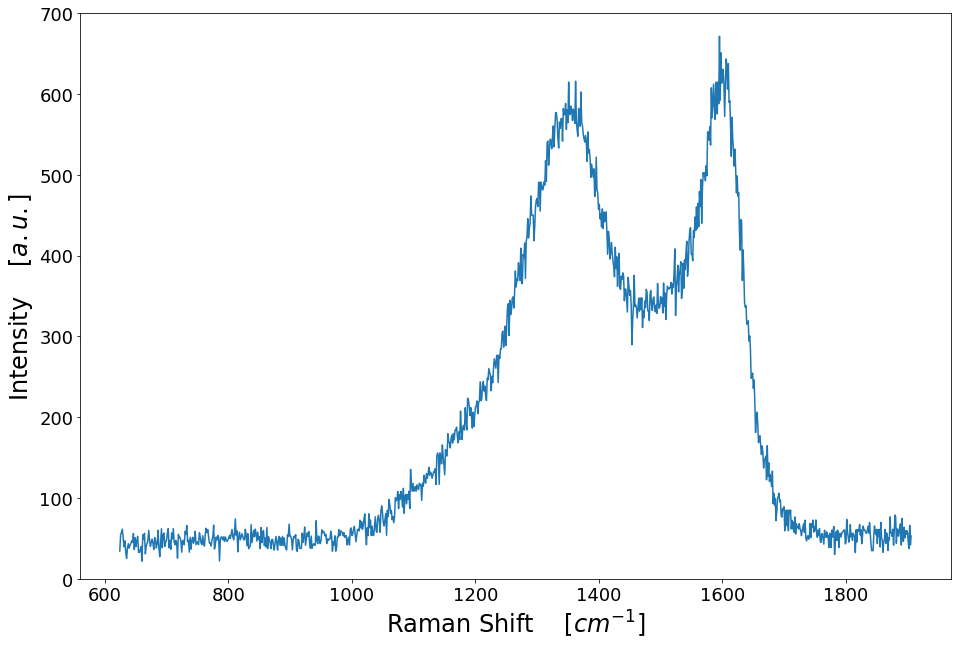

In [3]:
# Define x axis as the date axis
x_str = '#WaveA';      x_units = r'$[cm^{-1}]$';
y_str = '#IntensityA'; y_units = r'$[a.u.]$';

# Remove NANs from interesting x,y data
df_fil = pd.DataFrame(df_ram_raw);
df_fil = df_fil.dropna(subset=[x_str, y_str]);

# PLOT SETUP
scale = 5.2;
fig   = plt.figure(figsize=(3*scale, 2*scale));
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.tight_layout();

# Stablish the plot area
ax0 = plt.gca()

# Extract data from a specific country
x      = df_fil.iloc[:][x_str];
y      = df_fil.iloc[:][y_str];    
# Plot a curve to join the data points
plt.plot(x, y) #, label="A")
        
# # avoid overlaps between annotations and add a linking line
# kwargs = dict(transform=ax0.transAxes);
# adjust_text(texts_ax0, ax=ax0, arrowprops=dict(arrowstyle="-", color='k', lw=0.1), **kwargs);
        
# Show the plot lengend to link colors and polymer names
handles, labels = ax0.get_legend_handles_labels();
lgd = dict(zip(labels, handles));

# fig.autofmt_xdate();
ax0.set_xlabel('Raman Shift' + '    ' + x_units, fontsize=24);
ax0.set_ylabel('Intensity' + '    ' + y_units, fontsize=24);

plt.ylim(0,700)

for tick in ax0.xaxis.get_major_ticks():
    tick.label.set_fontsize(18)
for tick in ax0.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 

# Display main plot
# plt.legend(lgd.values(), lgd.keys(), prop={'size': 15}, loc="upper left");
plt.savefig('_Fig4a' + '.png', dpi=200, bbox_inches='tight');
plt.show();
mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults

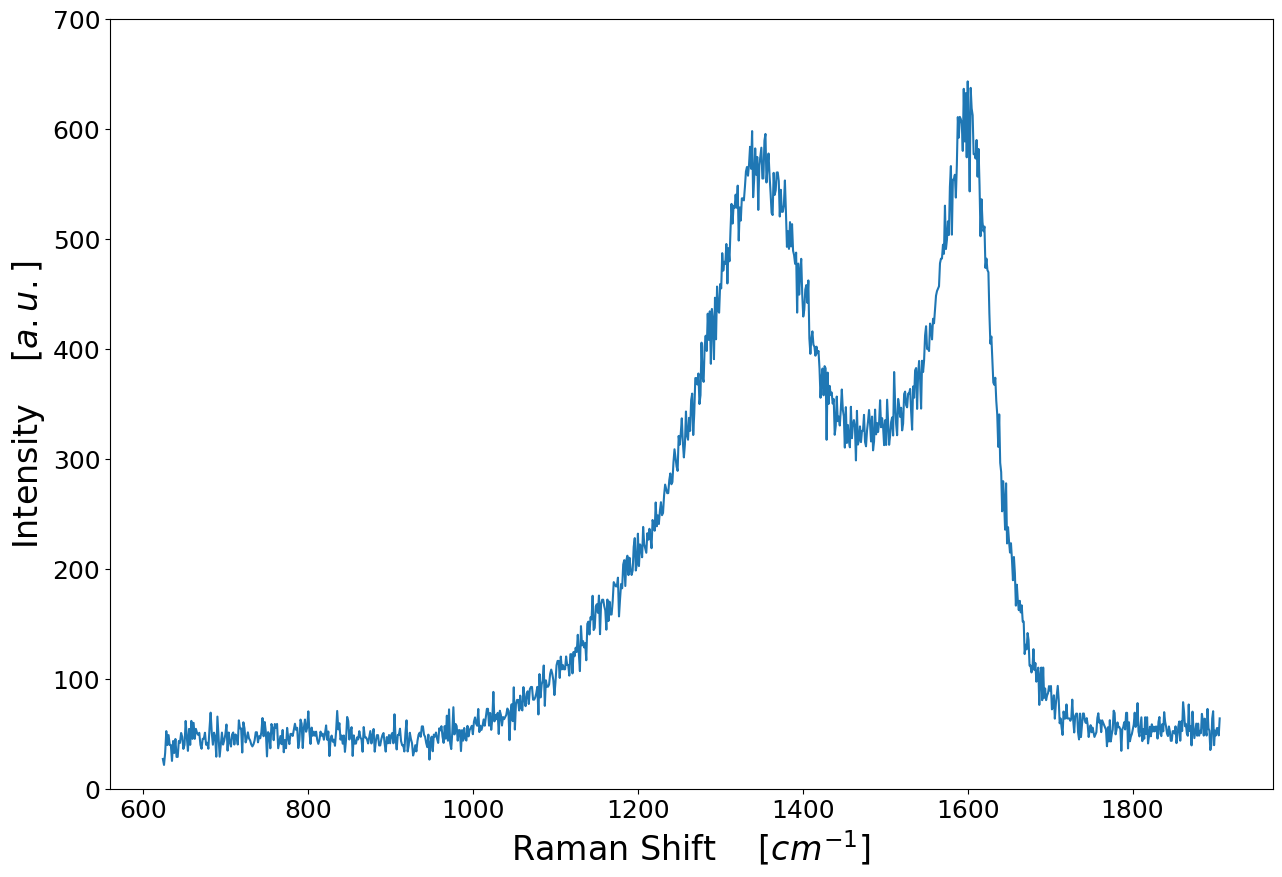

In [4]:
# Define x axis as the date axis
x_str = '#WaveB';      x_units = r'$[cm^{-1}]$';
y_str = '#IntensityB'; y_units = r'$[a.u.]$';

# Remove NANs from interesting x,y data
df_fil = pd.DataFrame(df_ram_raw);
df_fil = df_fil.dropna(subset=[x_str, y_str]);

# PLOT SETUP
scale = 5;
fig   = plt.figure(figsize=(3*scale, 2*scale));
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.tight_layout();

# Stablish the plot area
ax0 = plt.gca()

# Extract data from a specific country
x      = df_fil.iloc[:][x_str];
y      = df_fil.iloc[:][y_str];    
# Plot a curve to join the data points
plt.plot(x, y) #, label="B")
        
# # avoid overlaps between annotations and add a linking line
# kwargs = dict(transform=ax0.transAxes);
# adjust_text(texts_ax0, ax=ax0, arrowprops=dict(arrowstyle="-", color='k', lw=0.1), **kwargs);
        
# Show the plot lengend to link colors and polymer names
handles, labels = ax0.get_legend_handles_labels();
lgd = dict(zip(labels, handles));

# fig.autofmt_xdate();
ax0.set_xlabel('Raman Shift' + '    ' + x_units, fontsize=24);
ax0.set_ylabel('Intensity' + '    ' + y_units, fontsize=24);

plt.ylim(0,700)

for tick in ax0.xaxis.get_major_ticks():
    tick.label.set_fontsize(18)
for tick in ax0.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 

# Display main plot
# plt.legend(lgd.values(), lgd.keys(), prop={'size': 15}, loc="upper left");
plt.savefig('_Fig4b' + '.png', dpi=200, bbox_inches='tight');
plt.show();
mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults

---
# ./Resistivity.csv
---

In [5]:
df_res_raw = pd.read_csv("./Resistivity.csv", delimiter=",");
print("./Resistivity.csv"); display(df_res_raw.head(10));

./Resistivity.csv


,ControlSample,CompressedSample
0,0.967118,1.290323
1,1.109385,1.146789
2,1.253761,1.054630
3,0.916590,1.163914


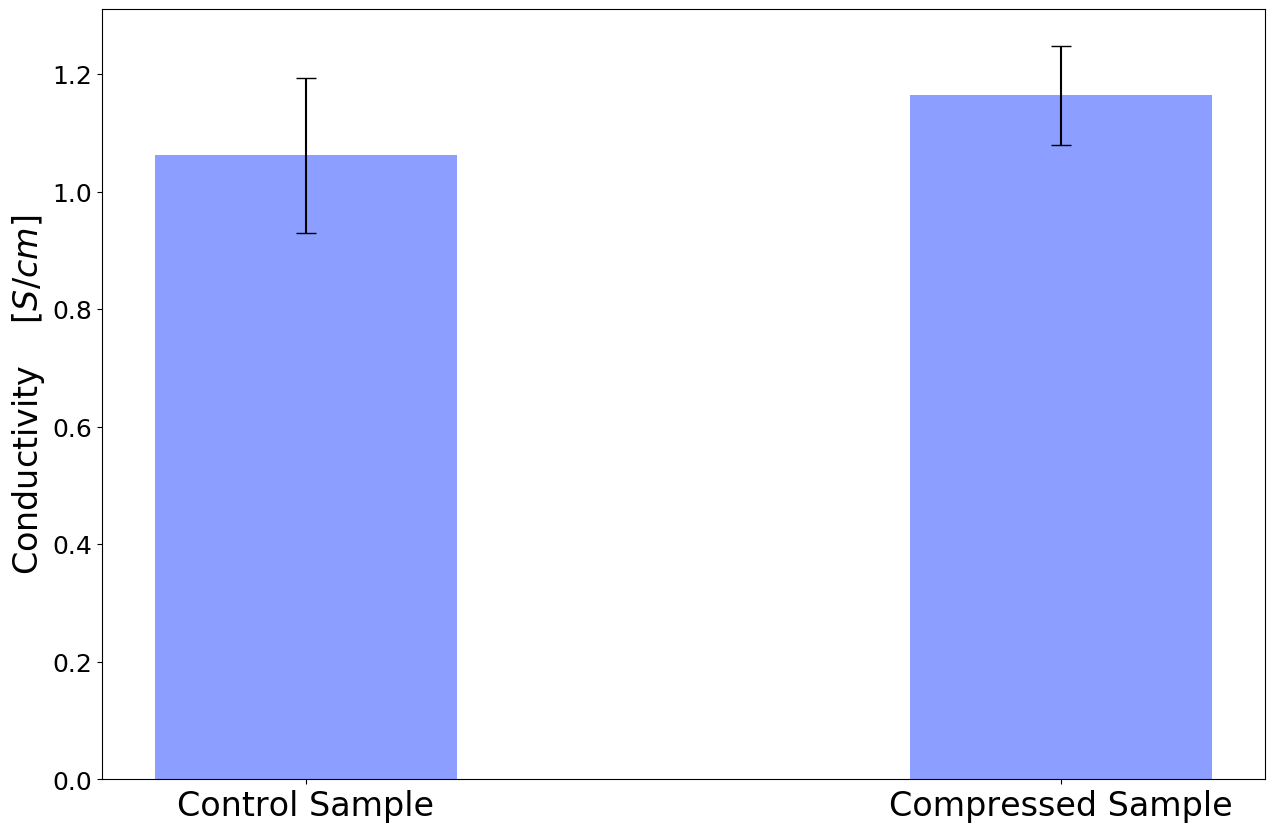

In [9]:
# Define x axis as the date axis
grp0_str = 'ControlSample';   x_units = '';
grp1_str = 'CompressedSample'; y_units = r'$[S/cm]$';

# Remove NANs from interesting x,y data
df_fil = pd.DataFrame(df_res_raw);
df_fil = df_fil.dropna(subset=[grp0_str, grp1_str]);

# PLOT SETUP
scale = 5;
fig   = plt.figure(figsize=(3*scale, 2*scale));
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.tight_layout();

# Stablish the plot area
ax0 = plt.gca()

bars = [np.mean(df_fil.iloc[:][grp0_str]), np.mean(df_fil.iloc[:][grp1_str])];
err  = [np.std(df_fil.iloc[:][grp0_str]), np.std(df_fil.iloc[:][grp1_str])];

r1 = np.arange(len(bars))

# Create blue bars
plt.bar(r1, bars, color='#8c9eff', width=0.4, yerr=err, capsize=7)
        
# Show the plot lengend to link colors and polymer names
handles, labels = ax0.get_legend_handles_labels();
lgd = dict(zip(labels, handles));

# fig.autofmt_xdate();
ax0.set_xlabel('', fontsize=24);
ax0.set_ylabel('Conductivity' + '    ' + y_units, fontsize=24);

# Change x-axis labels with protein names
plt.xticks([0,1],
           ['Control Sample','Compressed Sample'])

for tick in ax0.xaxis.get_major_ticks():
    tick.label.set_fontsize(24)
for tick in ax0.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 

# Display main plot
# plt.legend(lgd.values(), lgd.keys(), prop={'size': 15}, loc="upper left");
plt.savefig('_Fig3' + '.png', dpi=200, bbox_inches='tight');
plt.show();
mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults

---
# ./Resistivity.csv
---

In [7]:
df_xrd_raw = pd.read_csv("./XRD.csv", delimiter=",");
print("./XRD.csv");         display(df_xrd_raw.head(2));

./XRD.csv


,IntensityB,DegreesB,IntensityA,DegreesA,DegreesAp1000
0,5.00,950,5.00,1046,2046
1,5.05,936,5.05,1032,2032


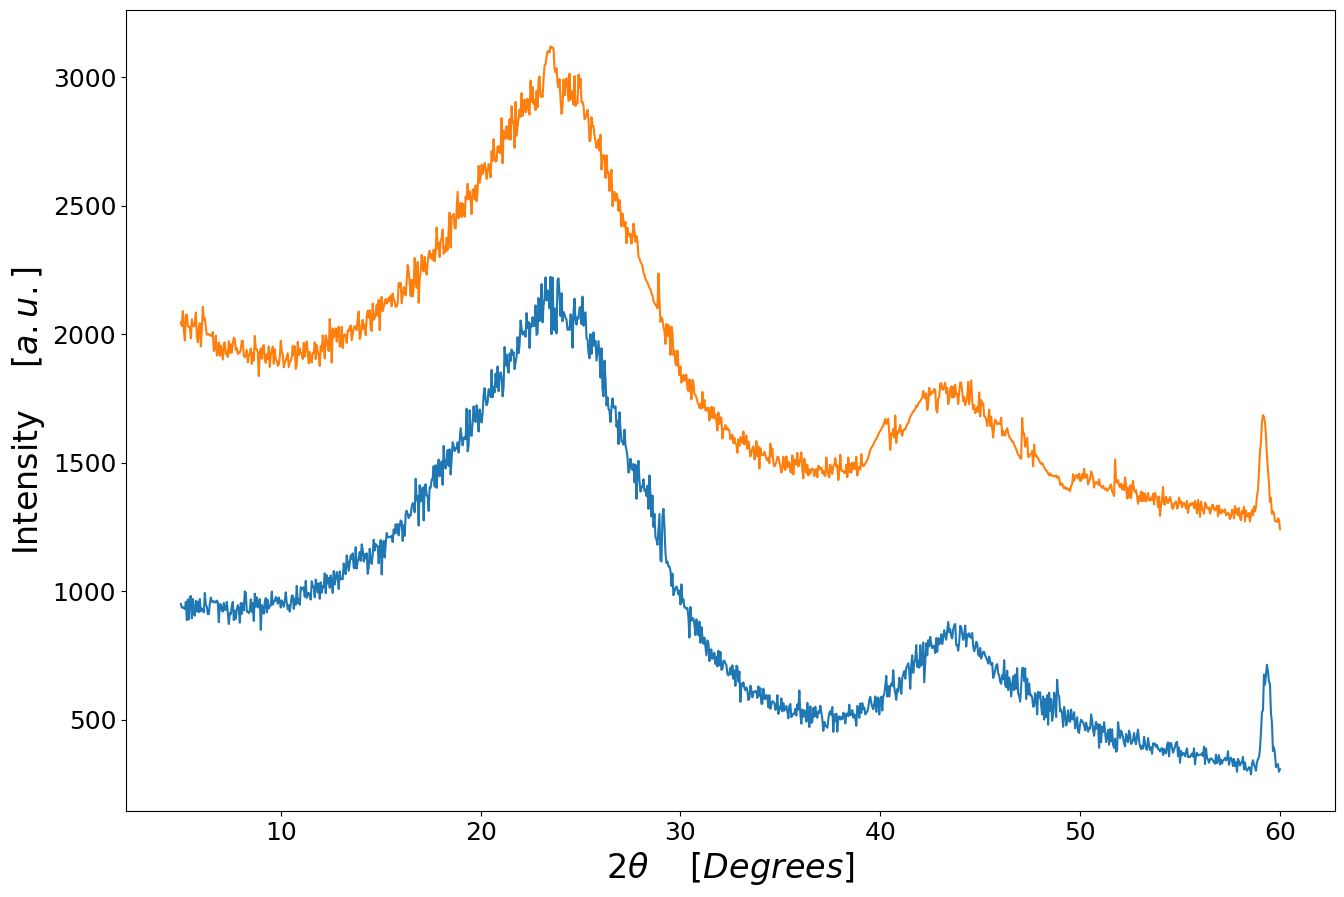

In [8]:
# PLOT SETUP
scale = 5.2;
fig   = plt.figure(figsize=(3*scale, 2*scale));
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.tight_layout();

# Stablish the plot area
df_fil = pd.DataFrame(df_xrd_raw);
ax0 = plt.gca()

# Define x axis as the date axis
x_str = 'DegreesB';   x_units = r'$[Degrees]$';
y_str = 'IntensityB'; y_units = r'$[a.u.]$';
# Remove NANs from interesting x,y data
df_fil = df_fil.dropna(subset=[x_str, y_str]);
# Extract data from a specific country
x      = df_fil.iloc[:][x_str];
y      = df_fil.iloc[:][y_str];    
# Plot a curve to join the data points
plt.plot(y, x) #, label="B")

# Define x axis as the date axis
x_str = 'DegreesAp1000';
y_str = 'IntensityA';
# Remove NANs from interesting x,y data
df_fil = df_fil.dropna(subset=[x_str, y_str]);
# Extract data from a specific country
x      = df_fil.iloc[:][x_str];
y      = df_fil.iloc[:][y_str];    
# Plot a curve to join the data points
plt.plot(y, x) #, label="B")
        
# # avoid overlaps between annotations and add a linking line
# kwargs = dict(transform=ax0.transAxes);
# adjust_text(texts_ax0, ax=ax0, arrowprops=dict(arrowstyle="-", color='k', lw=0.1), **kwargs);
        
# Show the plot lengend to link colors and polymer names
handles, labels = ax0.get_legend_handles_labels();
lgd = dict(zip(labels, handles));

# fig.autofmt_xdate();
ax0.set_xlabel(r'$2\theta$' + '    ' + x_units, fontsize=24);
ax0.set_ylabel('Intensity' + '    ' + y_units, fontsize=24);

for tick in ax0.xaxis.get_major_ticks():
    tick.label.set_fontsize(18)
for tick in ax0.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 

# Display main plot
# plt.legend(lgd.values(), lgd.keys(), prop={'size': 15}, loc="upper left");
plt.savefig('_Fig5' + '.png', dpi=200, bbox_inches='tight');
plt.show();
mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults